In [54]:
import tensorflow as tf
import keras
import numpy as np
from tqdm import tqdm

from keras.models import Sequential
from keras.applications import ResNet50
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
import glob, os
import PIL.Image

import csv
import pandas as pd
import seaborn as sns

In [48]:
all_labels = {}
label_dis = np.zeros(5)
with open("/Users/leon/Downloads/SCUT-FBP5500_v2/All_Ratings.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    line_count = 0
    for row in tqdm(csv_reader):
        if line_count == 0:
            line_count += 1
        else:
            line_count += 1
            all_labels[row[1].split(".")[0]] = row[2]
            label_dis[int(row[2]) -1] += 1

330001it [00:00, 481330.14it/s]


In [49]:
print(label_dis)

[ 19794.  67634. 159328.  62272.  20972.]


In [19]:
def to_array(i):
    out = np.zeros(5)
    out[i] = 1
    return (i - 2) 

In [69]:
path = "/Users/leon/Downloads/SCUT-FBP5500_v2/Scaled/"
valid_images = ".png"
images = []
labels = []
for f in tqdm(os.listdir(path)):
    if f.endswith(valid_images):
        img = PIL.Image.open(path + f).convert('RGB')
        images.append(np.array(img).reshape(128,128,3))
        labels.append(to_array(int(all_labels[f[:-7]]) - 1))
        
images = np.array(images)#.reshape(-1,128,128,3)
labels = np.array(labels)

100%|██████████| 5491/5491 [00:11<00:00, 484.50it/s]


In [70]:
print(images[3])

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [73]:
(trainX, testX, trainY, testY) = train_test_split(images, labels, test_size=0.25, random_state=42)

In [23]:
model = Sequential()
model.add(keras.layers.Conv2D(4, [3,3], activation='relu', padding='same'))
model.add(keras.layers.Conv2D(8, [3,3], activation='relu', padding='same'))
model.add(keras.layers.Conv2D(16, [3,3], activation='relu', padding='same'))

model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.15))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(50))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
#model.add(keras.layers.Activation('sigmoid'))

In [24]:
opt = keras.optimizers.RMSprop(0.001)
model.compile(loss="mse", optimizer=opt, metrics=['mae', 'mse'])

In [ ]:
# train the neural network
H = model.fit(x=trainX, y=trainY, validation_data=(testX, testY), epochs=5000, batch_size=20)
train_mse = model.evaluate(trainX, trainY, verbose=0)
test_mse = model.evaluate(testX, testY, verbose=0)

Train on 4117 samples, validate on 1373 samples
Epoch 1/5000
4117/4117 [==============================] - 3s 805us/step - loss: 0.6005 - mae: 0.5159 - mse: 0.6005 - val_loss: 0.5871 - val_mae: 0.5295 - val_mse: 0.5871
Epoch 2/5000
4117/4117 [==============================] - 3s 749us/step - loss: 0.6076 - mae: 0.5160 - mse: 0.6076 - val_loss: 0.6365 - val_mae: 0.5607 - val_mse: 0.6365
Epoch 3/5000
4117/4117 [==============================] - 3s 748us/step - loss: 0.6087 - mae: 0.5184 - mse: 0.6087 - val_loss: 0.6377 - val_mae: 0.5403 - val_mse: 0.6377
Epoch 4/5000
4117/4117 [==============================] - 3s 780us/step - loss: 0.5936 - mae: 0.5099 - mse: 0.5936 - val_loss: 0.7021 - val_mae: 0.5677 - val_mse: 0.7021
Epoch 5/5000
4117/4117 [==============================] - 3s 799us/step - loss: 0.6007 - mae: 0.5100 - mse: 0.6007 - val_loss: 0.6312 - val_mae: 0.5537 - val_mse: 0.6312
Epoch 6/5000
4117/4117 [==============================] - 3s 789us/step - loss: 0.5877 - mae: 0.5034 -

In [74]:
resnet = ResNet50(include_top=False, pooling="avg")
model = Sequential()
model.add(resnet)
model.add(Dense(1))
model.layers[0].trainable = False
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________
None


In [ ]:
model.compile(loss='mean_squared_error', optimizer=Adam())
model.fit(batch_size=32, x=trainX, y=trainY, validation_data=(testX, testY), epochs=30)

Train on 4117 samples, validate on 1373 samples
Epoch 1/30
3520/4117 [========================>.....] - ETA: 27s - loss: 0.8527

In [45]:
example_batch = testX[1000:1010]
example_result = model.predict(example_batch)
print(example_result)

[[1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]]


In [34]:
model.save('models/beauty_pred.ker') 

1


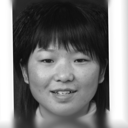

In [35]:
pred = all_labels["AF14"]
img = PIL.Image.open(path + "AF14_01.png").convert('L')
print(pred)
display(img)

In [36]:
print(model.predict(example_batch))

[[1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]]
